In [43]:

# --- IRIS FLOWER CLASSIFICATION by Jared Chiew ---
# This notebook loads the Iris dataset, performs EDA, trains Logistic Regression and Random Forest classifiers, evaluates them,
# and saves the best model to disk.

In [44]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
# Load the Iris dataset
iris = datasets.load_iris()
# Convert to Pandas DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add target and target names
df['target'] = iris.target
# Creates another column 'target_names' mapping target integers to species names
df['target_names'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

# Display first few rows of dataset
display(df.head())

# Prints dataset shape (rows, columns)
print(f"Dataset shape: {df.shape}")

# Show the basic statistics for each column (mean, std, min, max, etc.)
print("\nDataset statistics:")
display(df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Dataset shape: (150, 6)

Dataset statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


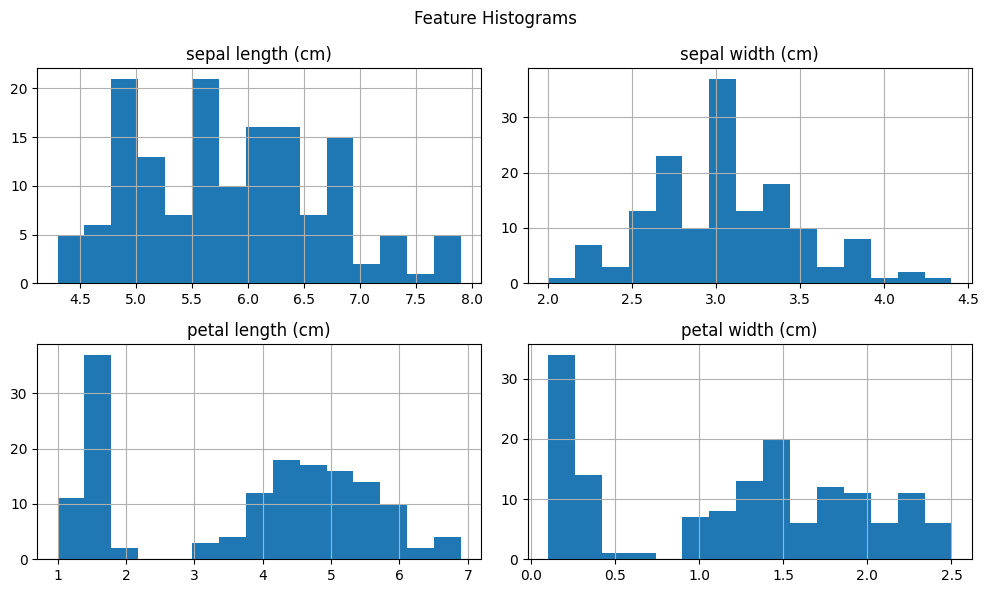

In [46]:
# Visualize the distribution of each feature using histograms
df[iris.feature_names].hist(figsize=(10,6), bins=15)
plt.suptitle("Feature Histograms") # Histogram title
plt.tight_layout() # Adjusts layout to prevent any overlap

plt.show()

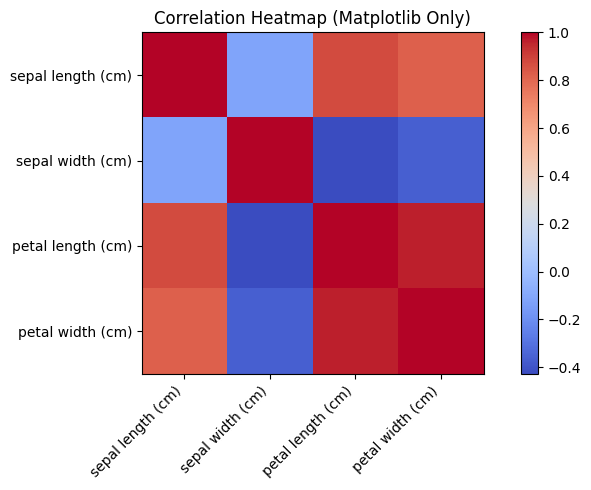

In [47]:
corr = df[iris.feature_names].corr()

plt.figure(figsize=(8,5))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

# Set tick labels
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.columns)

plt.title("Correlation Heatmap (Matplotlib Only)")
plt.tight_layout()
plt.show()

In [48]:
# X contains the four flower measurements
# y contains the target label
X = df[iris.feature_names]
y = df['target']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# StandardScaler normalizes the data so each feature has mean=0 and std=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit scaler on training data
X_test_scaled = scaler.transform(X_test)         # Apply scaler to test data


In [49]:
# Create the logistic regression model
log_model = LogisticRegression(max_iter=200)

# Fit model using the scaled training data
log_model.fit(X_train_scaled, y_train)

# Predict species for the test set
log_pred = log_model.predict(X_test_scaled)

# Evaluate accuracy and show the classification report
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))


🔹 Logistic Regression Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [50]:
# Create Random Forest model with 150 trees
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the model on the unscaled features
rf_model.fit(X_train, y_train)

# Predict species for the test set
rf_pred = rf_model.predict(X_test)

# Evaluate performance of the model
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

🔹 Random Forest Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



<Figure size 600x400 with 0 Axes>

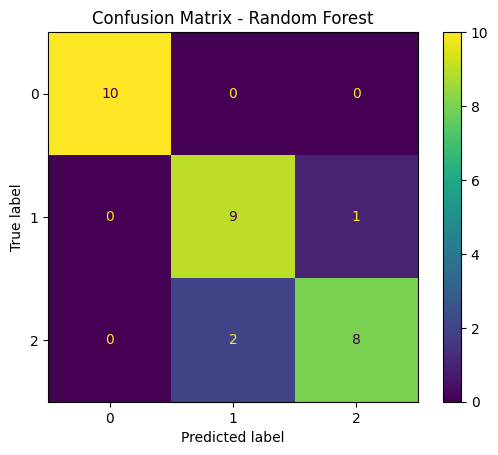

In [51]:
# Rows = actual species, Columns = predicted species.
# Perfect diagonal line means perfect predictions.

from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,4))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# Save the best model
best_model = rf_model
joblib.dump(best_model, "iris_best_model.pkl")

print("✅ Best model saved as iris_best_model.pkl")

✅ Best model saved as iris_best_model.pkl
